<a href="https://colab.research.google.com/github/CeiYsBennova/DACN/blob/main/IDS_StableBaseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install stable-baselines==2.10.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import pandas as pd

pd.set_option("display.max_columns", None)

dataset_folder = "/content/drive/MyDrive/ML/CIC-IDS-2017/dataset/"

# load data
files = os.listdir(dataset_folder)

df = pd.read_csv(os.path.join(dataset_folder, files[0]))
for file in files[1:]:
    df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))
    print(file)
    df_temp = pd.read_csv(os.path.join(dataset_folder, file))
    df = pd.concat([df, df_temp], ignore_index=True)

del df_temp

df.reset_index(drop=True, inplace=True)

<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Friday-WorkingHours-Morning.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Monday-WorkingHours.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Tuesday-WorkingHours.pcap_ISCX.csv


<ipython-input-2-15e14a6bf03c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_csv(os.path.join(dataset_folder, file)))


Wednesday-workingHours.pcap_ISCX.csv


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(2522009, 79)

In [ ]:
df.columns = df.columns.map(lambda x: "_".join(x.lower().strip().split(" ")))
df.columns

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [ ]:
# remove destination port and fwd header length columns
df.drop('destination_port', axis=1, inplace=True)
df.drop('fwd_header_length.1', axis=1, inplace=True)

In [ ]:
# check and drop zeros in columns
for col in df.columns:
    if df[col].astype(bool).sum(axis=0) == 0:
        print(col)
        df.drop(col, axis=1, inplace=True)

bwd_psh_flags
bwd_urg_flags
fwd_avg_bytes/bulk
fwd_avg_packets/bulk
fwd_avg_bulk_rate
bwd_avg_bytes/bulk
bwd_avg_packets/bulk
bwd_avg_bulk_rate


In [ ]:
# check INF values and replace with null values
for col in df.columns:
    if df[col].max() == float('inf'):
        print(col)
        df[col].replace(float('inf'), float('nan'), inplace=True)

# drop null values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

flow_bytes/s
flow_packets/s


In [ ]:
# binary label
df["label"] = df["label"].apply(lambda x: 0 if x == "BENIGN" else 1)

In [ ]:
features = [
    "bwd_packet_length_min",
    "subflow_fwd_bytes",
    "total_length_of_fwd_packets",
    "fwd_packet_length_mean",
    "bwd_packet_length_std",
    "flow_iat_min",
    "fwd_iat_min",
    "flow_iat_mean",
    "flow_duration",
    "flow_iat_std",
    "active_min",
    "active_mean",
    "bwd_iat_mean",
    "fwd_iat_mean",
    "init_win_bytes_forward",
    "ack_flag_count",
    "fwd_psh_flags",
    "syn_flag_count",
    "fwd_packets/s",
    "init_win_bytes_backward",
    "bwd_packets/s",
    "psh_flag_count",
    "packet_length_mean",
]

In [ ]:
df = df[features + ["label"]]
df.shape

(2520798, 24)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df["label"], test_size=0.2, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=True
)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train.iloc[:, :])

X_train.iloc[:, :] = scaler.transform(X_train.iloc[:, :])
X_val.iloc[:, :] = scaler.transform(X_val.iloc[:, :])
X_test.iloc[:, :] = scaler.transform(X_test.iloc[:, :])

<ipython-input-30-c892deefbaeb>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_train.iloc[:, :] = scaler.transform(X_train.iloc[:, :])
<ipython-input-30-c892deefbaeb>:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_val.iloc[:, :] = scaler.transform(X_val.iloc[:, :])
<ipython-input-30-c892deefbaeb>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-

In [ ]:
pd.concat([X_train, y_train], axis=1).to_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/train.csv", index=None)
pd.concat([X_test, y_test], axis=1).to_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/test.csv", index=None)
pd.concat([X_val, y_val], axis=1).to_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/val.csv", index=None)

In [ ]:
%cd /content/drive/MyDrive/ML/CIC-IDS-2017
!pwd

/content/drive/MyDrive/ML/CIC-IDS-2017
/content/drive/MyDrive/ML/CIC-IDS-2017


In [ ]:
import gymnasium as gym
import numpy as np
import pandas as pd

In [ ]:
class IDS_Env(gym.Env):
    def __init__(self, df):
        self.df = df
        # 0: normal, 1: attack
        self.action_space = gym.spaces.Discrete(2)
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(df.shape[1] - 1,), dtype=np.float64)
        # max episode
        self.max_steps = 1000

        # reward = (label, action)
        self.reward = {(0, 0): 0, (0, 1): -1, (1, 0): -1, (1, 1): 1}

        self.steps_beyond_done = None

    def reset(self,seed=None):
        self.steps_beyond_done = None
        self.current_step = 0

        # random start state
        self.state = np.random.randint(0, self.df.shape[0])

        # observation
        self.observation = self.df.iloc[self.state]

        # label of observation
        self.label = int(self.observation.pop('label'))

        obs, info = self.observation.values, {'state': self.state, 'label': self.label}
        return obs, info

    def step(self, action):
        reason = {}
        terminate = False
        truncate = False
        self.current_step += 1

        if self.current_step >= self.max_steps:
            terminate = True
            truncate = True
            reason['reason'] = 'max_episode'

        if self.label == 1 and action==0:
            terminate = True
            truncate = True
            reason['reason'] = 'attack missed'

        reward = self.reward[(self.label, action)]

        if not (terminate or truncate):
            self.state += 1
            if self.state >= self.df.shape[0]:
              self.state = 0

            self.observation = self.df.iloc[self.state]
            self.label = int(self.observation.pop('label'))

        elif self.steps_beyond_done is None:
            self.steps_beyond_done = 0
        else:
            self.steps_beyond_done += 1
            reward = 0

        return self.observation.values, reward, terminate,truncate, reason

In [ ]:
# load data
train_data = pd.read_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/train.csv")

In [ ]:
# create environment
env = IDS_Env(train_data)

In [ ]:
!pip install stable-baselines3
!pip install shimmy==0.2.1

In [ ]:
# import stable-baselines3
import tensorflow as tf
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import PPO

/usr/local/lib/python3.10/dist-packages/torch/utils/tensorboard/__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, "__version__") or LooseVersion(


In [ ]:
from stable_baselines3.common.env_checker import check_env

# check environment
check_env(env)

In [ ]:
# create environment
n_envs = 16
env = DummyVecEnv([lambda: IDS_Env(train_data)]*n_envs)

In [ ]:
!pip install swifter

In [ ]:
from stable_baselines3.common.callbacks import BaseCallback
from sklearn.metrics import accuracy_score, f1_score
import swifter

In [ ]:
class AccF1Callback(BaseCallback):
    def __init__(self, train, val, eval_freq):
        super().__init__()
        self.train_data = train
        self.val_data = val
        self.eval_freq = eval_freq

    def _on_step(self) -> bool:

        # This method will be called by the model after each call to `env.step()`.
        # return: (bool) If the callback returns False, training is aborted early.

        if self.eval_freq > 0 and self.n_calls % self.eval_freq == 0:
            super()._on_step()

            # Calculate metrics for training data
            predicted = self.train_data.drop(columns=["label"]).swifter.apply(
                lambda x: self.model.predict(x, deterministic=True)[0], axis=1
            )
            accuracy = accuracy_score(self.train_data["label"], predicted)
            f1 = f1_score(self.train_data["label"], predicted)

            print("-" * 60)
            print(f"timesteps: {self.num_timesteps}")
            print(f"Training   >>> accuracy: {accuracy:.4f}, f1-score: {f1:.4f}")

            # Calculate metrics for validation data
            predicted = self.val_data.drop(columns=["label"]).swifter.apply(
                lambda x: self.model.predict(x, deterministic=True)[0], axis=1
            )
            accuracy = accuracy_score(self.val_data["label"], predicted)
            f1 = f1_score(self.val_data["label"], predicted)
            print(f"Validation >>> accuracy: {accuracy:.4f}, f1-score: {f1:.4f}")
            print("-" * 60)

        return True

In [ ]:
val_data = pd.read_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/val.csv")
eval_callback = AccF1Callback(train_data, val_data, eval_freq=20000 // n_envs)

In [ ]:
from stable_baselines3 import A2C, PPO

model = PPO("MlpPolicy", env, verbose=1)

Using cpu device


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model.learn(1000000, callback=eval_callback)

------------------------------------------------------------
timesteps: 20000
Training   >>> accuracy: 0.3330, f1-score: 0.1002
Validation >>> accuracy: 0.3333, f1-score: 0.0993
------------------------------------------------------------
------------------------------
| time/              |       |
|    fps             | 1840  |
|    iterations      | 1     |
|    time_elapsed    | 17    |
|    total_timesteps | 32768 |
------------------------------
------------------------------------------------------------
timesteps: 40000
Training   >>> accuracy: 0.8311, f1-score: 0.0000
Validation >>> accuracy: 0.8320, f1-score: 0.0000
------------------------------------------------------------
------------------------------------------------------------
timesteps: 60000
Training   >>> accuracy: 0.8311, f1-score: 0.0000
Validation >>> accuracy: 0.8320, f1-score: 0.0000
------------------------------------------------------------
-----------------------------------------
| time/                 

In [ ]:
model.save('/content/drive/MyDrive/ML/CIC-IDS-2017/model/ppo_model')

In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    balanced_accuracy_score,
    confusion_matrix,
)
import matplotlib.pyplot as plt
import seaborn as sns

accuarcy: 0.9637248885830993
recall: 0.9126630502602198
precision: 0.8774599231455964
f1-score: 0.8947153484271978
balanced accuarcy: 0.9433818843057957

Confusion matrix:


<Axes: xlabel='Predicted', ylabel='Actual'>

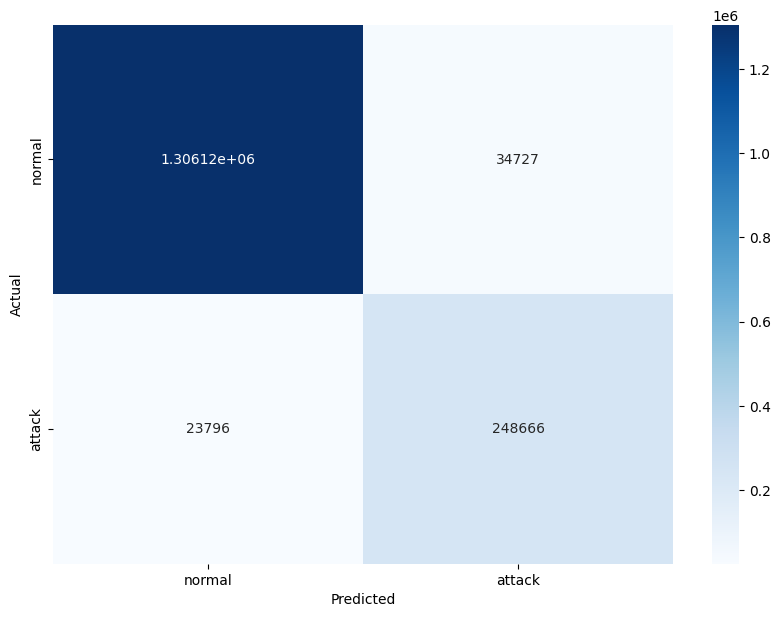

In [ ]:
pred = train_data.drop(columns=["label"]).swifter.apply(
    lambda x: model.predict(x, deterministic=True)[0], axis=1
)

print("accuarcy:", accuracy_score(train_data["label"], pred))
print("recall:", recall_score(train_data["label"], pred))
print("precision:", precision_score(train_data["label"], pred))
print("f1-score:", f1_score(train_data["label"], pred))
print("balanced accuarcy:", balanced_accuracy_score(train_data["label"], pred))

print("\nConfusion matrix:")
cm = confusion_matrix(train_data["label"], pred)
df_cm = pd.DataFrame(cm, columns=["normal", "attack"], index=["normal", "attack"])
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="g")

accuarcy: 0.9636871231355125
recall: 0.9130999277062217
precision: 0.8760563380281691
f1-score: 0.8941946483268799
balanced accuarcy: 0.9435026890884715

Confusion matrix:


<Axes: xlabel='Predicted', ylabel='Actual'>

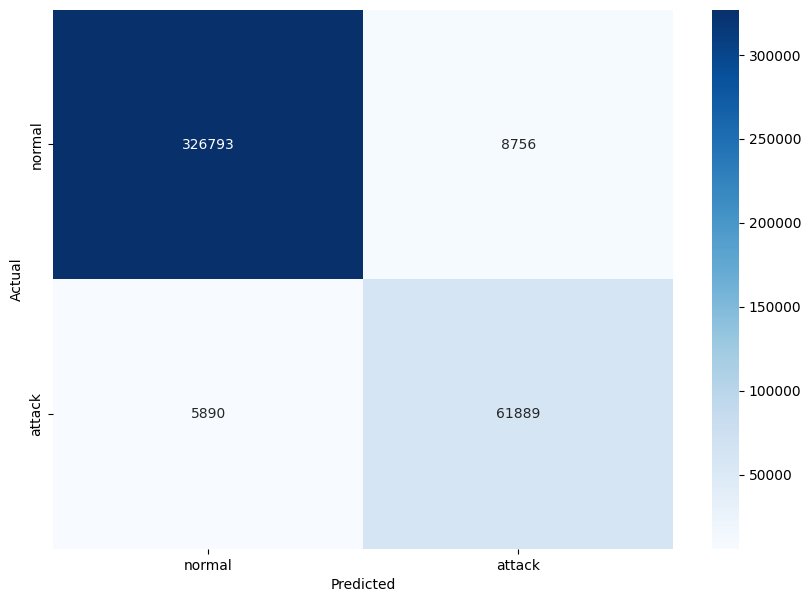

In [ ]:
pred = val_data.drop(columns=["label"]).swifter.apply(
    lambda x: model.predict(x, deterministic=True)[0], axis=1
)

print("accuarcy:", accuracy_score(val_data["label"], pred))
print("recall:", recall_score(val_data["label"], pred))
print("precision:", precision_score(val_data["label"], pred))
print("f1-score:", f1_score(val_data["label"], pred))
print("balanced accuarcy:", balanced_accuracy_score(val_data["label"], pred))

print("\nConfusion matrix:")
cm = confusion_matrix(val_data["label"], pred)
df_cm = pd.DataFrame(cm, columns=["normal", "attack"], index=["normal", "attack"])
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="g")

In [ ]:
test_data = pd.read_csv("/content/drive/MyDrive/ML/CIC-IDS-2017/processed_data/test.csv")

accuarcy: 0.9637277848302126
recall: 0.9125730994152047
precision: 0.8782939540957033
f1-score: 0.8951054566729953
balanced accuarcy: 0.9433739237103731

Confusion matrix:


<Axes: xlabel='Predicted', ylabel='Actual'>

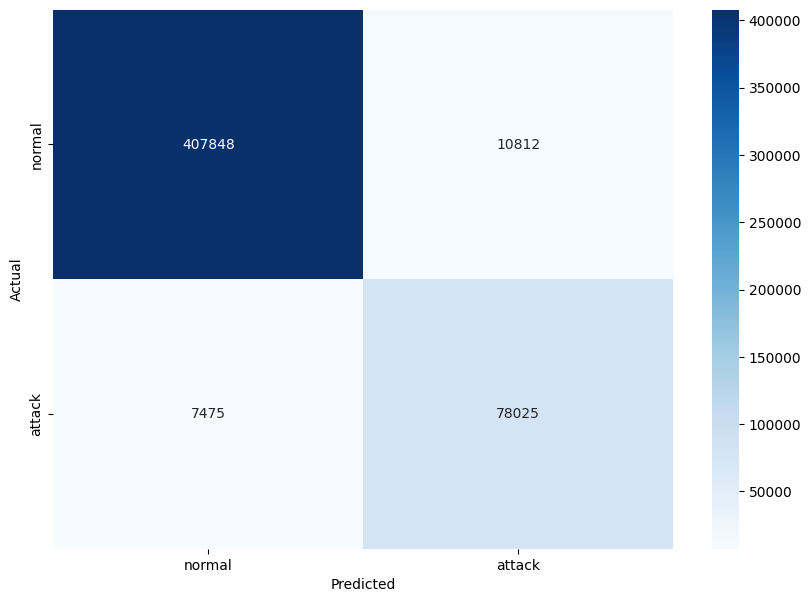

In [ ]:
pred = test_data.drop(columns=["label"]).swifter.apply(
    lambda x: model.predict(x, deterministic=True)[0], axis=1
)

print("accuarcy:", accuracy_score(test_data["label"], pred))
print("recall:", recall_score(test_data["label"], pred))
print("precision:", precision_score(test_data["label"], pred))
print("f1-score:", f1_score(test_data["label"], pred))
print("balanced accuarcy:", balanced_accuracy_score(test_data["label"], pred))

print("\nConfusion matrix:")
cm = confusion_matrix(test_data["label"], pred)
df_cm = pd.DataFrame(cm, columns=["normal", "attack"], index=["normal", "attack"])
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"

plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True, fmt="g")